# 비트코인 가격 예측

In [9]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 글꼴 한글 설정
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus= False)
plt.style.use('ggplot')

In [148]:
file_path = '../대연/market-price.csv'
bitcoin_df = pd.read_csv(file_path, names = ['day', 'price'])
bitcoin_df

,day,price
0,2017-08-27 00:00:00,4354.308333
1,2017-08-28 00:00:00,4391.673517
2,2017-08-29 00:00:00,4607.985450
3,2017-08-30 00:00:00,4594.987850
4,2017-08-31 00:00:00,4748.255000
...,...,...
360,2018-08-22 00:00:00,6575.229167
361,2018-08-23 00:00:00,6434.881667
362,2018-08-24 00:00:00,6543.645714
363,2018-08-25 00:00:00,6719.429231


In [83]:
bitcoin_df['day'] = pd.to_datetime(bitcoin_df['day'])
bitcoin_df

,day,price
0,2017-08-27,4354.308333
1,2017-08-28,4391.673517
2,2017-08-29,4607.985450
3,2017-08-30,4594.987850
4,2017-08-31,4748.255000
...,...,...
360,2018-08-22,6575.229167
361,2018-08-23,6434.881667
362,2018-08-24,6543.645714
363,2018-08-25,6719.429231


In [84]:
bitcoin_df.index = bitcoin_df['day']
bitcoin_df.set_index('day', inplace=True)

In [85]:
bitcoin_df

,price
day,
2017-08-27,4354.308333
2017-08-28,4391.673517
2017-08-29,4607.985450
2017-08-30,4594.987850
2017-08-31,4748.255000
...,...
2018-08-22,6575.229167
2018-08-23,6434.881667
2018-08-24,6543.645714


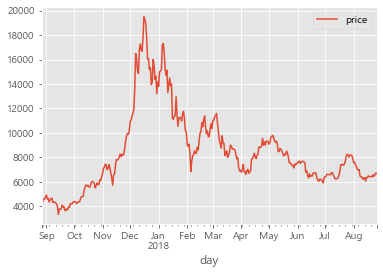

In [86]:
bitcoin_df.plot()
plt.show()

In [87]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

# (AR=2, 차분=1, MA=2) 파라미터로 ARIMA 모델을 학습합니다.
model = ARIMA(bitcoin_df.price.values, order=(2,1,2))

# trend : constant를 가지고 있는지, c - constant / nc - no constant
# disp : 수렴 정보를 나타냄
model_fit = model.fit(trend='c', full_output=True, disp=True)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  364
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2787.553
Method:                       css-mle   S.D. of innovations            512.415
Date:                Thu, 28 Jan 2021   AIC                           5587.107
Time:                        16:30:10   BIC                           5610.490
Sample:                             1   HQIC                          5596.400
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.3427     27.794      0.228      0.819     -48.133      60.818
ar.L1.D.y     -0.3790      1.830     -0.207      0.836      -3.966       3.208
ar.L2.D.y      0.1584      1.193      0.133      0.8

 - ARIMA모델 학습에 의한 예측결과

In [156]:
bitcoin_test_df = pd.read_csv('market-price-test.csv')
bitcoin_test_df

,day,price
0,2018-08-27,6707.96
1,2018-08-28,6901.26
2,2018-08-29,7078.19
3,2018-08-30,7032.13
4,2018-08-31,6986.54


In [161]:
bitcoin_test_df = bitcoin_test_df.rename({'day':'ds', 'price': 'y'},axis='columns')
bitcoin_test_df.to_csv('market-price-test.csv', index=False)

In [44]:
bitcoin_test_df['day'] = pd.to_datetime(bitcoin_test_df['day'])
bitcoin_test_df

,day,price
0,2018-01-29,11742.33
1,2018-01-30,11186.12
2,2018-01-31,10082.52
3,2018-02-01,10204.00
4,2018-02-02,9098.27
...,...,...
1091,2021-01-24,32099.74
1092,2021-01-25,32276.84
1093,2021-01-26,32243.26
1094,2021-01-27,32541.80


In [72]:
df = bitcoin_test_df.loc[210:214]

In [74]:
df = df.set_index('day')

In [99]:
df

,price
day,
2018-08-27,6707.96
2018-08-28,6901.26
2018-08-29,7078.19
2018-08-30,7032.13
2018-08-31,6986.54


In [145]:
bitcoin_test_df = pd.read_csv('market-price-test.csv')
bitcoin_test_df

,day,price
0,2018-08-27,6707.96
1,2018-08-28,6901.26
2,2018-08-29,7078.19
3,2018-08-30,7032.13
4,2018-08-31,6986.54


In [101]:
df.to_csv('market-price-test.csv')

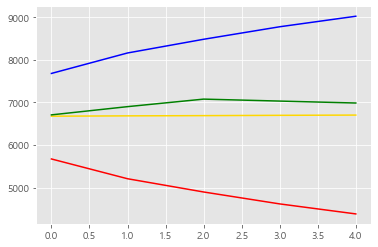

In [146]:
forecast_data = model_fit.forecast(steps=5) #학습 데이터셋으로부터 5일뒤 예측

# 테스트 데이터셋 
test_file_path = '../대연/market-price-test.csv'
bitcoin_test_df = pd.read_csv(test_file_path)

pred_y = forecast_data[0].tolist() #마지막 5일의 예측 데이터 (2018-08-27~31)
test_y = bitcoin_test_df.y.values # 실제 5일 가격 데이터

pred_y_lower = [] # 마지막 5일 예측 최소값
pred_y_upper = [] # 마지막 5일 예측 최대값

for lower_upper in forecast_data[2]:
    lower = lower_upper[0]
    upper = lower_upper[1]
    pred_y_lower.append(lower)
    pred_y_upper.append(upper)
    
plt.plot(pred_y, color='gold') #모델이 예측한 가격
plt.plot(pred_y_lower, color='red') #모델이 예측한 가격 최소값
plt.plot(pred_y_upper, color='blue') #모델이 예측한 가격 최대값
plt.plot(test_y, color='green') # 실제 가격

- Prophet에서 계절성을 고려하도록 Ture값을 잡고 모델을 만들기 (ARIMA보다 편차를 조금 줄일수있다)

In [173]:
from fbprophet import Prophet

# prophet을 사용하기 위해서는 다음과 같이 피쳐의 이름을 변경해야 한다 :'ds', 'y'
bitcoin_df = pd.read_csv(file_path, names=['ds','y'])
prophet = Prophet(seasonality_mode='multiplicative',
                  yearly_seasonality=True,
                  weekly_seasonality=True, daily_seasonality=True,
                  changepoint_prior_scale=0.5)
prophet.fit(bitcoin_df)

In [174]:
# 5일을 내다보며 예측합니다.
futuer_data = prophet.make_future_dataframe(periods=5, freq='d')
forecast_data = prophet.predict(futuer_data)
forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(5)

,ds,yhat,yhat_lower,yhat_upper
365,2018-08-27,6882.306915,6228.576990,7588.995871
366,2018-08-28,6976.002532,6276.003206,7711.382143
367,2018-08-29,6986.465207,6228.776234,7646.034258
368,2018-08-30,7055.474837,6351.924098,7788.342278
369,2018-08-31,7133.441748,6315.010300,7858.624836


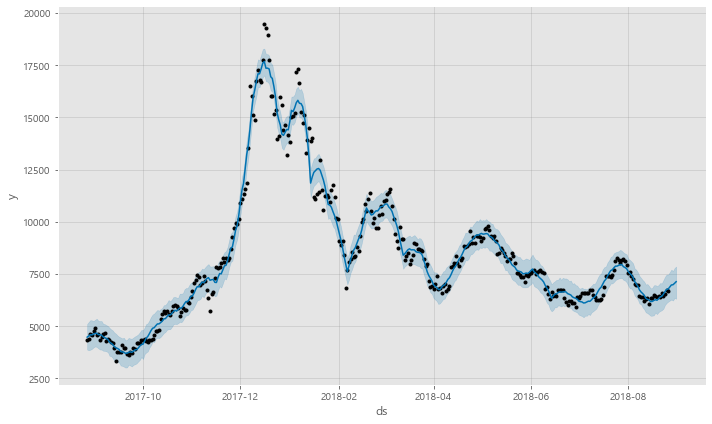

In [175]:
# 모델링하여 만들어진 forecast_date의 전체 데이터확인
fig1 = prophet.plot(forecast_data)

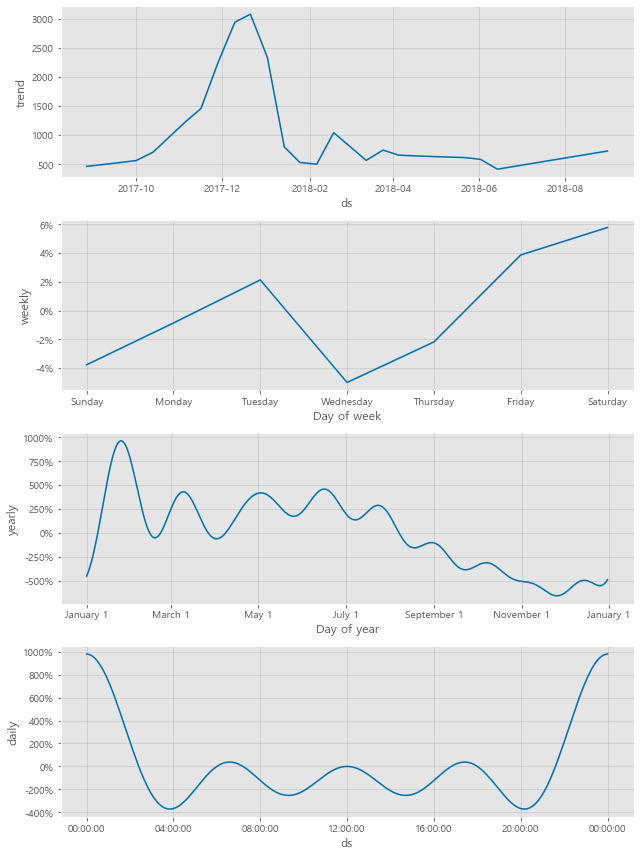

In [176]:
fig2 = prophet.plot_components(forecast_data)

- 하루로 봤을 땐 한국 저녁 9시 이후 상승하는데, 이는 코인 시장의 메인인 북미 기준으로 이때가 하루 일과의 시작인 아침이라고 판단됩니다.

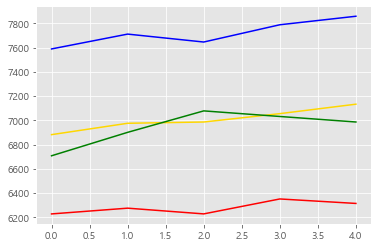

In [177]:
# 앞으로 5일 뒤와 실제 데이터를 비교
test_file_path = '../대연/market-price-test.csv'
bitcoin_test_df = pd.read_csv(test_file_path)

pred_y = forecast_data.yhat.values[-5:] # 마지막 5일의 예측 데이터입니다. (2018-08-27 ~ 2018-08-31)
test_y = bitcoin_test_df.y.values # 실제 5일 가격 데이터입니다. (2018-08-27 ~ 2018-08-31)
pred_y_lower = forecast_data.yhat_lower.values[-5:] # 마지막 5일의 예측 데이터의 최소값입니다.
pred_y_upper = forecast_data.yhat_upper.values[-5:] # 마지막 5일의 예측 데이터의 최대값입니다.

plt.plot(pred_y, color="gold") # 모델이 예상한 가격 그래프입니다.
plt.plot(pred_y_lower, color="red") # 모델이 예상한 최소가격 그래프입니다.
plt.plot(pred_y_upper, color="blue") # 모델이 예상한 최대가격 그래프입니다.
plt.plot(test_y, color="green") # 실제 가격 그래프입니다.

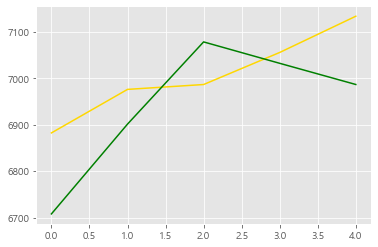

In [178]:
plt.plot(pred_y, color="gold") # 모델이 예상한 가격 그래프입니다.
plt.plot(test_y, color="green") # 실제 가격 그래프입니다.

-  https://tjansry354.tistory.com/14